<a href="https://colab.research.google.com/github/anvitha-jain/MLColab/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CRIME ANALYSIS**

### **Team members**

1.   Anvitha SHubhaveer Jain
2.   Junteng Tan
3.   Sangwon Song


Explain the project. 

## **1.**  Configuration of the System : Iterative, Notebook, code structure, data, where will it reside, folders, cloud buckets etc

The analysis in this notebook makes use of 2 data sets are obtained from **Kaggel**(https://www.kaggle.com/datasets).


*   The **Crime Data set** is obtained from https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783
*   The **Housing Data set** is obtained from **multiple listing service santa clara** association of realtors



## **2. Data Collection : initial Data Set**

In [2]:
#data set is stores in the google drive  
from google.colab import drive 
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# initializing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
crime_data_file = "/content/drive/My Drive/MLFall2019/crimerate-seers/Datasets/Police_Department_Incident_Reports__2016_to_Present.csv"
housing_data_file = "/content/drive/My Drive/MLFall2019/crimerate-seers/Datasets/housing_data.csv"
crime_data = pd.read_csv(crime_data_file)
housing_data = pd.read_csv(housing_data_file)

print('Crime Data Shape: {}'.format(crime_data.shape))
print('Housing Data Shape: {}'.format(housing_data.shape))

Crime Data Shape: (553649, 12)
Housing Data Shape: (1345, 15)


## **3. Set Data Narrative : Set Business Objectives, what use case are you solving for**

###Objective
- to use the crime data analysis to see how the crime rate has effects on real estate pricing by combine the housing data (edited) 
- to check how specific crime like drugs would effect our neighborhood. (edited)

## **4. Exploratory Data Analysis and Visualization**

### **4.1. feature analysis and engineering (for ML, for DL it's feature extraction)**


In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553649 entries, 0 to 553648
Data columns (total 12 columns):
IncidntNum    553649 non-null int64
Category      547915 non-null object
Descript      553649 non-null object
DayOfWeek     553649 non-null object
Date          553649 non-null object
Time          553649 non-null object
PdDistrict    553648 non-null object
Resolution    553649 non-null object
Address       553649 non-null object
X             553649 non-null float64
Y             553649 non-null float64
Location      553649 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 50.7+ MB


In [7]:
crime_data.describe()

,IncidntNum,X,Y
count,5.536490e+05,553649.000000,553649.000000
mean,1.751739e+08,-122.423639,37.769350
std,1.147764e+07,0.026137,0.023730
min,1.131000e+06,-122.513642,37.707922
25%,1.661914e+08,-122.433798,37.756769
50%,1.760461e+08,-122.417194,37.775422
75%,1.809073e+08,-122.406945,37.785388
max,9.910090e+08,-122.363743,37.829991


In [8]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 15 columns):
Unnamed: 0           1345 non-null int64
S                    1345 non-null object
MLS #                1345 non-null object
Street Address       1345 non-null object
Price                1345 non-null object
DOM                  1006 non-null float64
Beds Total           1345 non-null int64
Bths                 1345 non-null object
Sq Ft Total          1331 non-null object
Lot Size             1345 non-null object
Postal City          1345 non-null object
Property Sub Type    1345 non-null object
Age                  1345 non-null int64
Latitude             1325 non-null float64
Longitude            1325 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 157.7+ KB


In [9]:
housing_data.describe()

,Unnamed: 0,DOM,Beds Total,Age,Latitude,Longitude
count,1345.000000,1006.000000,1345.000000,1345.000000,1325.000000,1325.000000
mean,443.750929,27.087475,2.634944,65.245353,37.744308,-122.438232
std,392.538121,30.014860,1.227705,34.699894,0.026208,0.035019
min,1.000000,0.000000,0.000000,0.000000,37.707817,-122.510285
25%,1.000000,11.000000,2.000000,36.000000,37.721438,-122.466985
50%,501.000000,16.000000,2.000000,72.000000,37.738610,-122.435528
75%,1001.000000,32.000000,3.000000,92.000000,37.763669,-122.408252
max,1001.000000,266.000000,9.000000,141.000000,37.805888,-122.367022


### **4.2. Analyze data**


In [36]:
crime_data.head()


,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Longitude,Latitude,datetime,Dbscan_label,KmeanLabel,GmmLabel,DayLabel,CategoryLabel,ResolutionLabel,PdDistrictLabel,NewCategoryLabel
0,warrant,"Warrant Arrest, Local SF Warrant",Sunday,9/29/19,11:32,ingleside,cite or arrest adult,SUNNYDALE AVE \ SANTOS ST,-122.418283,37.712349,2019-09-29,0,2,2,7,45,2,2,3
2,recovered vehicle,"Vehicle, Recovered, Auto",Sunday,9/29/19,0:30,richmond,open or active,TRANSVERSE DR \ JOHN F KENNEDY DR,-122.479895,37.770496,2019-09-29,0,1,1,7,31,16,6,0
3,missing person,Found Person,Sunday,9/29/19,15:18,taraval,open or active,23RD AVE \ NORIEGA ST,-122.480759,37.754051,2019-09-29,0,1,1,7,26,16,8,6
4,assault,Battery,Sunday,9/29/19,0:15,tenderloin,open or active,EDDY ST \ LARKIN ST,-122.417529,37.783311,2019-09-29,0,0,0,7,1,16,9,8
5,assault,Battery,Sunday,9/29/19,0:15,northern,open or active,LARKIN ST \ 09TH ST \ MARKET ST,-122.416292,37.777494,2019-09-29,0,0,0,7,1,16,4,8


In [37]:
housing_data.head()

,Unnamed: 0,S,MLS #,Street Address,Price,DOM,Beds Total,Bths,Sq Ft Total,Lot Size,Postal City,Property Sub Type,Age,Latitude,Longitude,KmeanLabel,GmmLabel
0,501,S,ML81687928,32 Acton Street,"$878,000",6.0,2,1|0,"1,100","1,751 Lot SqFt",San Francisco,Res. Single Family,70,37.707817,-122.452154,1,1
1,501,S,ML81714276,41 Liebig Street,"$1,062,000",7.0,2,1|0,"1,140","2,644 Lot SqFt",San Francisco,Res. Single Family,82,37.707983,-122.455542,1,1
2,1001,S,ML81750568,60 Rice Street,"$700,000",1.0,2,1|0,"1,200","2,822 Lot SqFt",San Francisco,Res. Single Family,92,37.708019,-122.456720,1,1
4,1,S,ML81723558,19 Canyon Drive,"$1,265,000",12.0,3,2|0,"2,015","3,589 Lot SqFt",San Francisco,Res. Single Family,57,37.708683,-122.430262,2,2
5,501,S,ML81686475,363 Polaris Way,"$1,005,000",20.0,3,1|0,"1,168","4,055 Lot SqFt",San Francisco,Res. Single Family,56,37.708755,-122.439770,2,2


### **4.3. Visualize data**


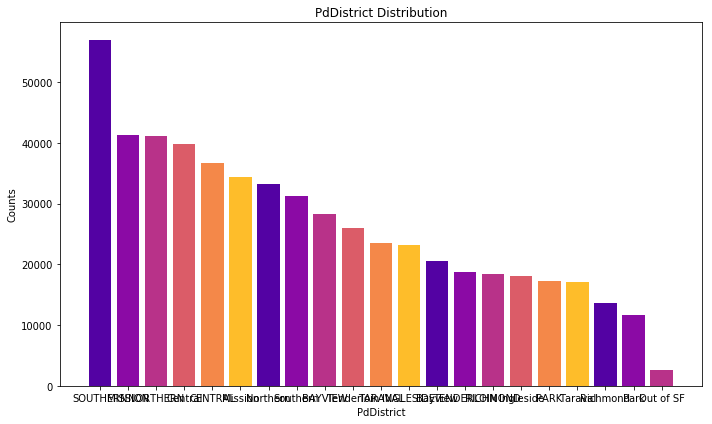

In [5]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.bar(crime_data['PdDistrict'].value_counts().index, 
        crime_data['PdDistrict'].value_counts(),
        color=sns.color_palette('plasma'))
plt.xlabel('PdDistrict')
plt.ylabel('Counts')
plt.title('PdDistrict Distribution')
plt.tight_layout()

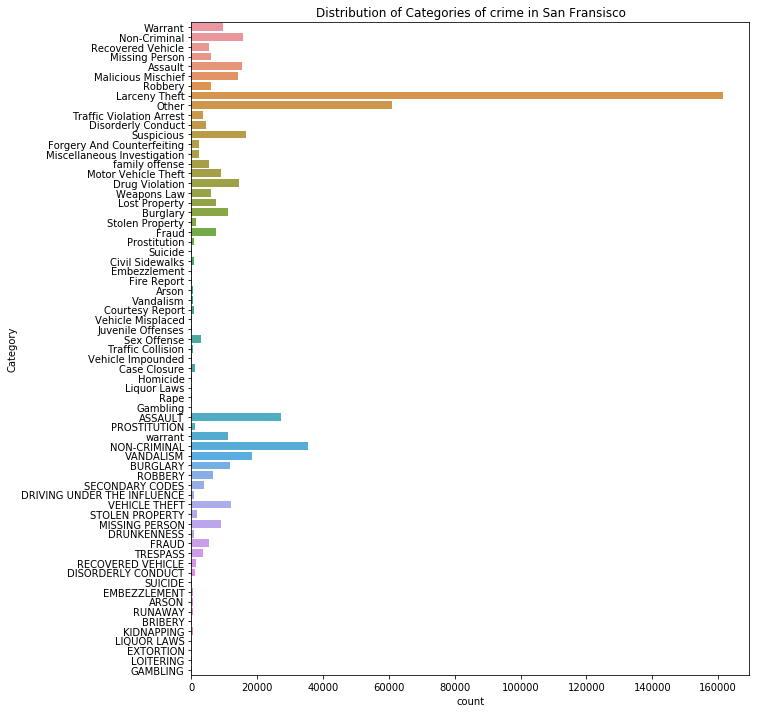

In [6]:
plt.figure(figsize=(10,12))
plt.title('Distribution of Categories of crime in San Fransisco')
sns.countplot(y=crime_data['Category'])

### **4.4. Run Stats: mean, median, mode, correlation, variance**


### **4.5. .corr**


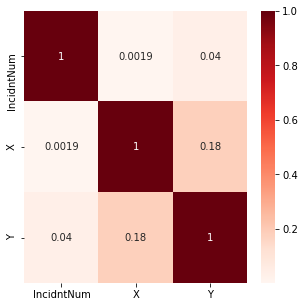

In [7]:
#.corr befor data curation.
plt.figure(figsize=(5,5))
cor = crime_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### **4.6. pairplot()**


### **4.7. gini score**


### **4.8. feature_importance with xgboost**

## **5. Data Prep: Curation**

### **5.1. Feature Selection and Extraction : what are the main features to use in this data set?**

In [0]:
# X, Y ,datetime, Category, Resolution and PdDistrict are the  main features for Crime DataSet
crime_data['Longitude'] = crime_data['X']
crime_data['Latitude'] = crime_data['Y']
crime_data['datetime'] = pd.to_datetime(crime_data['Date'])
crime_data = crime_data.drop(['IncidntNum', 'X', 'Y', 'Location'], axis=1)

In [0]:
crime_data['Category'] = crime_data['Category'].str.lower()
crime_data['Resolution'] = crime_data['Resolution'].str.lower()
crime_data['PdDistrict'] = crime_data['PdDistrict'].str.lower()

In [0]:
crime_data = crime_data[crime_data['Category'] != 'non-criminal']
crime_data = crime_data[crime_data['Category'] != 'secondary codes']
crime_data = crime_data[crime_data['Category'] != 'case closure']
crime_data = crime_data[crime_data['PdDistrict'] != 'out of sf']

### **5.2. Data Verification: Do we have enough data?**


In [11]:
print('Crime Data Shape: {}'.format(crime_data.shape))
print('Housing Data Shape: {}'.format(housing_data.shape))

Crime Data Shape: (495210, 11)
Housing Data Shape: (1345, 15)


### **5.3. Possibility of Amalgamation1: Add Dataset 2**


In [0]:
# add housing dataset

### **5.4. Data Cleansing**

In [13]:
#remove NaN rows
crime_data = crime_data.dropna()
location_data = crime_data[['Latitude', 'Longitude']].values

print('New Crime Data Shape: {}\n'.format(crime_data.shape))
print('Crime Data first 5 heading rows:')
crime_data.head(5)

New Crime Data Shape: (489545, 11)

Crime Data first 5 heading rows:


,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Longitude,Latitude,datetime
0,warrant,"Warrant Arrest, Local SF Warrant",Sunday,9/29/19,11:32,ingleside,cite or arrest adult,SUNNYDALE AVE \ SANTOS ST,-122.418283,37.712349,2019-09-29
2,recovered vehicle,"Vehicle, Recovered, Auto",Sunday,9/29/19,0:30,richmond,open or active,TRANSVERSE DR \ JOHN F KENNEDY DR,-122.479895,37.770496,2019-09-29
3,missing person,Found Person,Sunday,9/29/19,15:18,taraval,open or active,23RD AVE \ NORIEGA ST,-122.480759,37.754051,2019-09-29
4,assault,Battery,Sunday,9/29/19,0:15,tenderloin,open or active,EDDY ST \ LARKIN ST,-122.417529,37.783311,2019-09-29
5,assault,Battery,Sunday,9/29/19,0:15,northern,open or active,LARKIN ST \ 09TH ST \ MARKET ST,-122.416292,37.777494,2019-09-29


In [14]:
print('Housing Data first 5 heading rows:')
#remove NaN rows
housing_data = housing_data.dropna()
housing_data.head(5)

Housing Data first 5 heading rows:


,Unnamed: 0,S,MLS #,Street Address,Price,DOM,Beds Total,Bths,Sq Ft Total,Lot Size,Postal City,Property Sub Type,Age,Latitude,Longitude
0,501,S,ML81687928,32 Acton Street,"$878,000",6.0,2,1|0,"1,100","1,751 Lot SqFt",San Francisco,Res. Single Family,70,37.707817,-122.452154
1,501,S,ML81714276,41 Liebig Street,"$1,062,000",7.0,2,1|0,"1,140","2,644 Lot SqFt",San Francisco,Res. Single Family,82,37.707983,-122.455542
2,1001,S,ML81750568,60 Rice Street,"$700,000",1.0,2,1|0,"1,200","2,822 Lot SqFt",San Francisco,Res. Single Family,92,37.708019,-122.456720
4,1,S,ML81723558,19 Canyon Drive,"$1,265,000",12.0,3,2|0,"2,015","3,589 Lot SqFt",San Francisco,Res. Single Family,57,37.708683,-122.430262
5,501,S,ML81686475,363 Polaris Way,"$1,005,000",20.0,3,1|0,"1,168","4,055 Lot SqFt",San Francisco,Res. Single Family,56,37.708755,-122.439770


### **5.5. Data Regularization**

In [0]:
# ADD code

### **5.6. Data Normalization**

In [0]:
# ADD code

## **6. Unsupervised Exploration : Find relevant Clusters in Your Data**

### **6.1. How many clusters? Explore different k’s**

###Elbow method
Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance between data points and their assigned clusters’ centroids. 

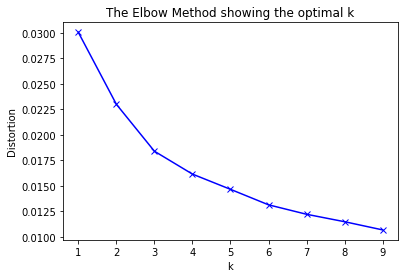

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(location_data)
    kmeanModel.fit(location_data)
    distortions.append(sum(np.min(cdist(location_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / location_data.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based on the Elbow Method, the value of **K is 3**.

### **6.2. Select Clustering algorithms, run several and compare in a table**



1.   DBScan Clusterning
2.   K-means Clusterning
3.   Gausian Mixture Model (GMM) Clustering



###DBSCAN Clustering
Using DBSCAN clustering method, to indicate the outlier and filter out these outlier

Text(0.5, 1.0, 'DBSCAN')

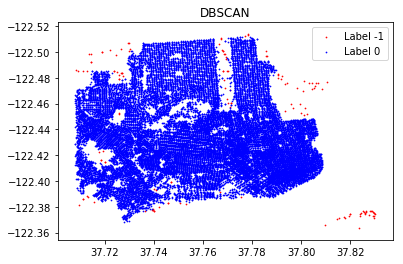

In [18]:
from sklearn.cluster import DBSCAN

location_latlon = np.unique(location_data, axis=0)

db = DBSCAN(eps=0.002, min_samples=10)
db.fit(location_latlon)
dbscan_labels = db.fit_predict(location_latlon)

location_latlon_df = pd.DataFrame({'latitude': location_latlon[:,0], 
                                  'longitude': location_latlon[:,1],
                                  'label': dbscan_labels})
fig, ax = plt.subplots()
colors = ['blue', 'red']
for i, dbscan_label in location_latlon_df.groupby('label'):
    if i == 0:
        color = 'b'
    else:
        color = 'r'
    _ = ax.scatter(dbscan_label['latitude'], dbscan_label['longitude'], c=color, s=0.5, label='Label {}'.format(i))

ax.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.title("DBSCAN")

**Filtering**
Labeling the outlier and filter them out

In [0]:
# Filter the outliers
crime_data['Dbscan_label'] = 0
for index in location_latlon_df.loc[location_latlon_df['label'] != 0].index:
    crime_outlier_index = crime_data.loc[(location_latlon_df.loc[index, 'latitude'] == crime_data['Latitude']) & (location_latlon_df.loc[index, 'longitude'] == crime_data['Longitude'])].index
    crime_data.loc[crime_outlier_index, 'Dbscan_label'] = -1

crime_data = crime_data[crime_data['Dbscan_label'] != -1]
crime_data_location = crime_data[['Latitude', 'Longitude']].values

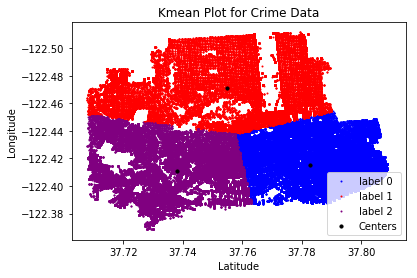

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(crime_data_location)
kmean_label = kmeans.predict(crime_data_location)
crime_data['KmeanLabel'] = kmean_label

fig, ax = plt.subplots()
colors = ['blue', 'red', 'purple']
# cmap = plt.cm.get_cmap('viridis')
for i in range(3):
    _ = ax.scatter(crime_data.loc[crime_data['KmeanLabel'] == i, 'Latitude'], crime_data.loc[crime_data['KmeanLabel'] == i, 'Longitude'], c=colors[i], s=1, label='label {}'.format(i))

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=1, label='Centers')

ax.legend(loc='lower right')
plt.title('Kmean Plot for Crime Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.gca().invert_yaxis()
plt.show()

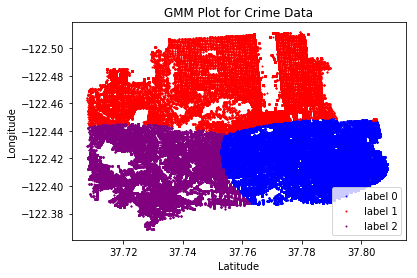

In [21]:
from sklearn.mixture import GaussianMixture 

gmm_sklearn = GaussianMixture(n_components = 3,covariance_type='full')
gmm_sklearn.fit(crime_data_location)
gmm_label = gmm_sklearn.predict(crime_data_location)
crime_data['GmmLabel'] = gmm_label

fig, ax = plt.subplots()
colors = ['blue', 'red', 'purple']
for i in range(3):
    _ = ax.scatter(crime_data.loc[crime_data['GmmLabel'] == i, 'Latitude'], crime_data.loc[crime_data['GmmLabel'] == i, 'Longitude'], c=colors[i], s=1, label='label {}'.format(i))
    
ax.legend(loc='lower right')
plt.title('GMM Plot for Crime Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.gca().invert_yaxis()
plt.show()


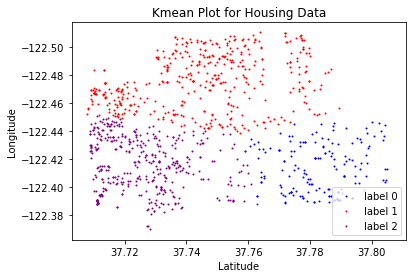

In [22]:
housing_data_location = housing_data[['Latitude', 'Longitude']].values

housing_kmean_label = kmeans.predict(housing_data_location)
housing_data['KmeanLabel'] = housing_kmean_label

fig, ax = plt.subplots()
colors = ['blue', 'red', 'purple']

for i in range(3):
     _ = ax.scatter(housing_data.loc[housing_data['KmeanLabel'] == i, 'Latitude'], housing_data.loc[housing_data['KmeanLabel'] == i, 'Longitude'], c=colors[i], s=1, label='label {}'.format(i))

ax.legend(loc='lower right')
plt.title('Kmean Plot for Housing Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.gca().invert_yaxis()

In [23]:
from sklearn.metrics import silhouette_score

score = silhouette_score (housing_data_location, housing_kmean_label, metric='euclidean')
print ("Kmean: n_clusters = {}, silhouette score is {})".format(3, score))

Kmean: n_clusters = 3, silhouette score is 0.4440246433094136)


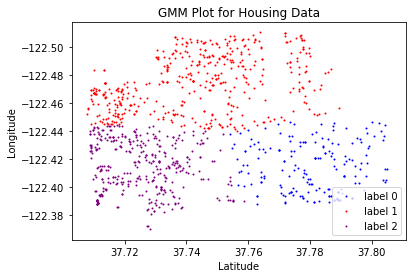

In [24]:
housing_gmm_label = gmm_sklearn.predict(housing_data_location)
housing_data['GmmLabel'] = housing_gmm_label

fig, ax = plt.subplots()
colors = ['blue', 'red', 'purple']
for i in range(3):
    _ = ax.scatter(housing_data.loc[housing_data['GmmLabel'] == i, 'Latitude'], housing_data.loc[housing_data['GmmLabel'] == i, 'Longitude'], c=colors[i], s=1, label='label {}'.format(i))

ax.legend(loc='lower right')
plt.title('GMM Plot for Housing Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.gca().invert_yaxis()

In [25]:
score = silhouette_score (housing_data_location, housing_gmm_label, metric='euclidean')

print ("GMM: n_clusters = {}, silhouette score is {})".format(3, score))

GMM: n_clusters = 3, silhouette score is 0.44290238482163635)


1.   K-means Clusterning  - n_clusters = 3, silhouette score is 0.4440246433094136)
2.   GMM Clusterning - n_clusters = 3, silhouette score is 0.44180902297648)

###Silhouette analysis 

**Silhouette analysis** is used to determine the degree of separation between clusters<br>
If it is 0 –> the sample is very close to the neighboring clusters.<br>
It it is 1 –> the sample is far away from the neighboring clusters.<br>
It it is -1 –> the sample is assigned to the wrong clusters.<br>

We want the coefficients to be as big as possible and close to 1 to have a good clusters.
Kmean and GMM have similar result, but Kmean has slightly larger coefficient than GMM. 
Kmean is better fit for our dataset.


### **6.3. What does each cluster mean? How do they contribute to your Data Narrative?**

In [0]:
# Answer

###**6.4. Measure goodness of your clusters (e.g., BICs)**

In [0]:
# answer

## **7.Supervised Training Preparation: Data Curation : label your data set**

In [28]:
def set_day_label(day_of_week):
    if 'Monday' in day_of_week:
        return 1
    if 'Tuesday' in day_of_week:
        return 2
    if 'Wednesday' in day_of_week:
        return 3
    if 'Thursday' in day_of_week:
        return 4
    if 'Friday' in day_of_week:
        return 5
    if 'Saturday' in day_of_week:
        return 6
    if 'Sunday' in day_of_week:
        return 7

    
crime_data['DayLabel'] = crime_data['DayOfWeek'].apply(lambda x: set_day_label(x))
# print(crime_data['Resolution'].unique())

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# crime_data['DayLabel'] = le.fit_transform(crime_data['DayOfWeek'])
# for i in crime_data['DayLabel'].unique():
#     print(str(i)+" is reperesenting " + crime_data[crime_data['DateLabel']==i]['DayOfWeek'].unique())

crime_data['CategoryLabel'] = le.fit_transform(crime_data['Category'])
for i in crime_data['CategoryLabel'].unique():
    print( "{}: {}".format(i, crime_data[crime_data['CategoryLabel']==i]['Category'].unique()) )

print('\n')

crime_data['ResolutionLabel'] = le.fit_transform(crime_data['Resolution'])
for i in crime_data['ResolutionLabel'].unique():
    print( "{}: {}".format(i, crime_data[crime_data['ResolutionLabel']==i]['Resolution'].unique()) )
    
print('\n')

crime_data['PdDistrictLabel'] = le.fit_transform(crime_data['PdDistrict'])
for i in crime_data['PdDistrictLabel'].unique():
    print( "{}: {}".format(i, crime_data[crime_data['PdDistrictLabel']==i]['PdDistrict'].unique()) )
    
crime_data.head(5)

45: ['warrant']
31: ['recovered vehicle']
26: ['missing person']
1: ['assault']
24: ['malicious mischief']
32: ['robbery']
20: ['larceny theft']
28: ['other']
39: ['traffic violation arrest']
6: ['disorderly conduct']
37: ['suspicious']
14: ['forgery and counterfeiting']
25: ['miscellaneous investigation']
12: ['family offense']
27: ['motor vehicle theft']
8: ['drug violation']
46: ['weapons law']
23: ['lost property']
3: ['burglary']
35: ['stolen property']
15: ['fraud']
29: ['prostitution']
36: ['suicide']
4: ['civil sidewalks']
10: ['embezzlement']
13: ['fire report']
0: ['arson']
41: ['vandalism']
5: ['courtesy report']
43: ['vehicle misplaced']
18: ['juvenile offenses']
34: ['sex offense']
38: ['traffic collision']
42: ['vehicle impounded']
17: ['homicide']
21: ['liquor laws']
30: ['rape']
16: ['gambling']
7: ['driving under the influence']
44: ['vehicle theft']
9: ['drunkenness']
40: ['trespass']
33: ['runaway']
2: ['bribery']
19: ['kidnapping']
11: ['extortion']
22: ['loitering'

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Longitude,Latitude,datetime,Dbscan_label,KmeanLabel,GmmLabel,DayLabel,CategoryLabel,ResolutionLabel,PdDistrictLabel
0,warrant,"Warrant Arrest, Local SF Warrant",Sunday,9/29/19,11:32,ingleside,cite or arrest adult,SUNNYDALE AVE \ SANTOS ST,-122.418283,37.712349,2019-09-29,0,2,2,7,45,2,2
2,recovered vehicle,"Vehicle, Recovered, Auto",Sunday,9/29/19,0:30,richmond,open or active,TRANSVERSE DR \ JOHN F KENNEDY DR,-122.479895,37.770496,2019-09-29,0,1,1,7,31,16,6
3,missing person,Found Person,Sunday,9/29/19,15:18,taraval,open or active,23RD AVE \ NORIEGA ST,-122.480759,37.754051,2019-09-29,0,1,1,7,26,16,8
4,assault,Battery,Sunday,9/29/19,0:15,tenderloin,open or active,EDDY ST \ LARKIN ST,-122.417529,37.783311,2019-09-29,0,0,0,7,1,16,9
5,assault,Battery,Sunday,9/29/19,0:15,northern,open or active,LARKIN ST \ 09TH ST \ MARKET ST,-122.416292,37.777494,2019-09-29,0,0,0,7,1,16,4


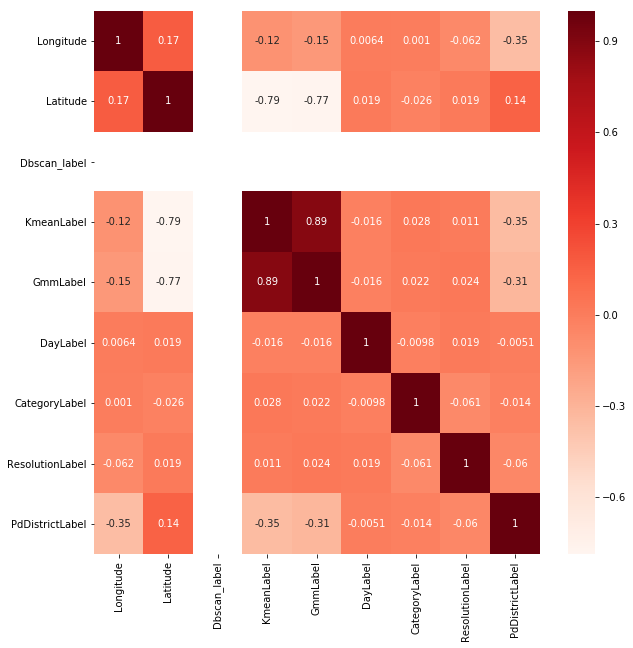

In [29]:
#.corr after data curation.
plt.figure(figsize=(10,10))
cor = crime_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### **7.1. Classify Your Data Sets : Run different classification algorithms**



1.   Random Forest Classification
2.   Decision Tree Classification



**Random Forest Classification**

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_rf = crime_data[['DayLabel', 'PdDistrictLabel', 'Latitude', 'Longitude', 'ResolutionLabel']]
y_rf = crime_data['CategoryLabel']

x_train, x_test, y_train, y_test = train_test_split(x_rf, y_rf, test_size=0.3, random_state=0)
clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(x_train, y_train)
print('Score: {}'.format(clf_rf.score(x_test, y_test)))

Score: 0.32111301958090005


**Decision Tree Classfication**

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_dt = crime_data[['DayLabel', 'PdDistrictLabel', 'Latitude', 'Longitude', 'ResolutionLabel']]
y_dt = crime_data[['CategoryLabel']]

x_dt_train, x_dt_test, y_dt_train, y_dt_test = train_test_split(x_dt, y_dt, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_dt_train, y_dt_train)
y_pred = clf.predict(x_dt_test)
print("Accuracy:", metrics.accuracy_score(y_dt_test, y_pred))

Accuracy: 0.31060116798351084


In [32]:
crime_data['Category'].unique()

def set_category_label(category):
    vehicle_relatived = ['recovered vehicle', 'traffic violation arrest', 'motor vehicle theft', 'vehicle misplaced', 'traffic collision', 'vehicle impounded', 'driving under the influence', 'vehicle theft']
    mischief = ['assult', 'malicious mischief', 'vandalism', 'trespass']
    fire = ['fire report', 'arson']
    police_involved = ['warrant', 'miscellaneous investigation', 'homicide', 'runaway']
    property_lost = ['robbery', 'larceny theft', 'lost property', 'burglary', 'stolen property']
    bussiness = ['bribery', 'fraud', 'embezzlement', 'extortion', 'forgery and counterfeiting']
    missing = ['missing person', 'kidnapping']
    liquor_drug = ['drug violation', 'loitering', 'liquor laws']
    other_miscellaneous = ['weapons law', 'civil sidewalks', 'courtesy report', 'gambling', 'other', 'disorderly conduct', 'suspicious']
    family = ['family offense', 'juvenile offenses', 'suicide']
    sexual = ['prostitution', 'rape']
    
    if category in vehicle_relatived:
        return 0
    if category in mischief:
        return 1
    if category in fire:
        return 2
    if category in police_involved:
        return 3
    if category in property_lost:
        return 4
    if category in bussiness:
        return 5
    if category in missing:
        return 6
    if category in liquor_drug :
        return 7
    if category in other_miscellaneous:
        return 8
    if category in family:
        return 9
    if category in sexual:
        return 10
    return 8
crime_data['NewCategoryLabel'] = crime_data['Category'].apply(lambda x: set_category_label(x))

for i in crime_data['NewCategoryLabel'].unique():
    print( "{}: {}".format(i, crime_data[crime_data['NewCategoryLabel']==i]['Category'].unique()) )
    

3: ['warrant' 'miscellaneous investigation' 'homicide' 'runaway']
0: ['recovered vehicle' 'traffic violation arrest' 'motor vehicle theft'
 'vehicle misplaced' 'traffic collision' 'vehicle impounded'
 'driving under the influence' 'vehicle theft']
6: ['missing person' 'kidnapping']
8: ['assault' 'other' 'disorderly conduct' 'suspicious' 'weapons law'
 'civil sidewalks' 'courtesy report' 'sex offense' 'gambling'
 'drunkenness']
1: ['malicious mischief' 'vandalism' 'trespass']
4: ['robbery' 'larceny theft' 'lost property' 'burglary' 'stolen property']
5: ['forgery and counterfeiting' 'fraud' 'embezzlement' 'bribery' 'extortion']
9: ['family offense' 'suicide' 'juvenile offenses']
7: ['drug violation' 'liquor laws' 'loitering']
10: ['prostitution' 'rape']
2: ['fire report' 'arson']


In [33]:
y_dt = crime_data[['NewCategoryLabel']]

x_dt_train, x_dt_test, y_dt_train, y_dt_test = train_test_split(x_dt, y_dt, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_dt_train, y_dt_train)
y_pred = clf.predict(x_dt_test)
print("Accuracy:", metrics.accuracy_score(y_dt_test, y_pred))


Accuracy: 0.4255444864307798


### **7.2. Measure Classification Success**

1.   Random Forest Classification - Score: 0.31999312950875985

> before bucketing the  Ctegory for Decision Tree
2.   Decision Tree Classification - Accuracy: 0.3106973548608726

> after bucketing the  Ctegory for Decision Tree
3.   Decision Tree Classification - Accuracy: 0.4253658536585366

### **7.3. What regression objectives should we have? Complete your , add to your Data Story** 

In [0]:
# answer

### **7.4. Run Regressions using various algorithms**



1.   Logistic Regression
2.   X Regression.......



**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
x_lgr = crime_data[['DayLabel', 'PdDistrictLabel', 'Latitude', 'Longitude', 'ResolutionLabel']]
y_lgr = crime_data['CategoryLabel']

x_lgr_train, x_lgr_test, y_lgr_train, y_lgr_test = train_test_split(x_lgr, y_lgr, test_size=0.3, random_state=0)
clf = LogisticRegression()
clf.fit(x_lgr,y_lgr)
y_lgr_pred = clf.predict(x_lgr_test)
print("Accuracy:", metrics.accuracy_score(y_lgr_test,y_lgr_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.3546616283064239


**Linear Regression**

In [0]:
# from math import radians, cos, sin, asin, sqrt
# from scipy.spatial.distance import pdist, squareform

# def haversine(lonlat1, lonlat2):
#     """
#     Calculate the great circle distance between two points 
#     on the earth (specified in decimal degrees)
#     """
#     # convert decimal degrees to radians 
#     lat1, lon1 = lonlat1
#     lat2, lon2 = lonlat2
#     lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

#     # haversine formula 
#     dlon = lon2 - lon1 
#     dlat = lat2 - lat1 
#     a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#     c = 2 * asin(sqrt(a)) 
#     r = 6371 # Radius of earth in kilometers. Use 3956 for miles
#     return c * r

# location_data = crime_data[['Longitude', 'Latitude']].values
# distance_matrix = squareform(pdist(location_data, (lambda u,v: haversine(u,v))))


#https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a


### **7.5. Measure Success of Regressions and**


1.   Logistic Regression - Accuracy: 0.3546616283064239
2.   X Regression.......

### **7.6. Compare Regressions in a table**

1.   Logistic Regression - Accuracy: 0.3546616283064239
2.   X Regression.......

time split is:


1.   morning: 6AM - 11:59 AM
2.   noon: 12PM -5:59 PM
3.   evening: 6PM - 11:59PM
4.   mid-night:1 2AM-5:59AM





